In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load in Data

In [288]:
df = pd.read_csv('Pokemon.csv')
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [289]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [291]:
df.size

10400

## 2. Extract and Explore Data

In [292]:
pokedex_entry = df['#'].to_numpy() # Entry number in pokedex
name = df['Name'].to_numpy() # Name of pokemon
type_1 = df['Type 1'].to_numpy() # Primary type of pokemon
type_2 = df['Type 2'].to_numpy() # Secondary type of pokemon (can be null)
total = df['Total'].to_numpy() # Total of hp, attack, defense, sp. atk, sp. def, speed
hp = df['HP'].to_numpy()
attack = df['Attack'].to_numpy()
defense = df['Defense'].to_numpy()
sp_attack = df['Sp. Atk'].to_numpy()
sp_defense = df['Sp. Def'].to_numpy()
speed = df['Speed'].to_numpy()
generation = df['Generation'].to_numpy() # Release sequence
legendary = df['Legendary'].to_numpy() # Legendary status or normal

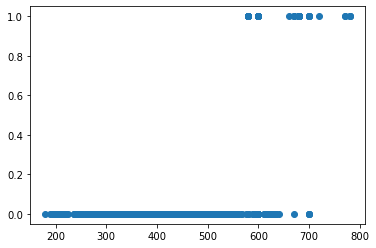

In [293]:
# Plot some parameters to check their behaviour wrt legendary status

plt.scatter(total, legendary)

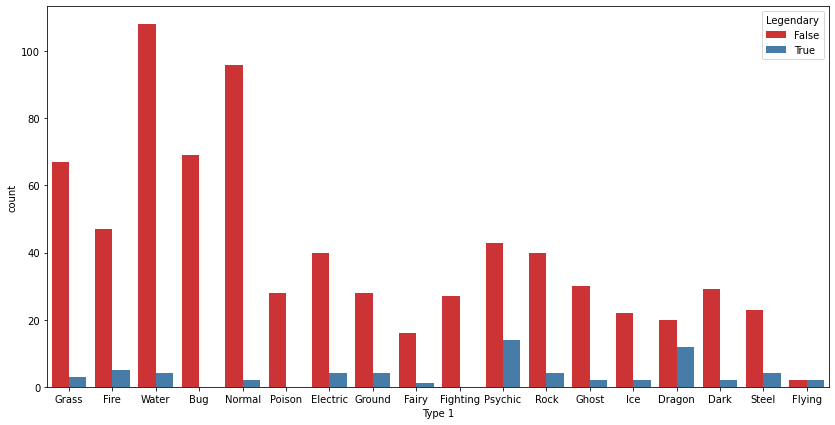

In [294]:
plt.figure(figsize=(14,7))
sns.countplot(x='Type 1',hue='Legendary',data=df,palette='Set1')

## 3. Preprocessing of Data

The goal is to use two features to determine the legendary status of a pokemon. We will perform a univariate selection to see which features have the strongest relationship with the output variable

In [295]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing

In [296]:
# encode the labels for type_1
le = preprocessing.LabelEncoder()
y = le.fit_transform(legendary)

In [297]:
extracted_features = df

# Label encode string columns 
extracted_features.Name = pd.factorize(extracted_features.Name)[0]
extracted_features['Type 1'] = pd.factorize(extracted_features['Type 1'])[0]

# remove label column and remove type 2 column since half of the records are Nan 
extracted_features.drop(['Legendary', 'Type 2'], axis = 'columns', inplace = True)

In [298]:
extracted_features

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,0,0,318,45,49,49,65,65,45,1
1,2,1,0,405,60,62,63,80,80,60,1
2,3,2,0,525,80,82,83,100,100,80,1
3,3,3,0,625,80,100,123,122,120,80,1
4,4,4,1,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...,...
795,719,795,11,600,50,100,150,100,150,50,6
796,719,796,11,700,50,160,110,160,110,110,6
797,720,797,10,600,80,110,60,150,130,70,6
798,720,798,10,680,80,160,60,170,130,80,6


In [299]:
# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)

# data labels are the primary type of the pokemon
fit = bestfeatures.fit(extracted_features,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(extracted_features.columns)

# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

# naming the dataframe columns
featureScores.columns = ['Specs','Score'] 

# print 5 best features
print(featureScores.nlargest(5,'Score'))  

     Specs        Score
3    Total  6653.335125
1     Name  2543.918370
7  Sp. Atk  2367.537383
0        #  2249.334525
5   Attack  1271.171306


We can also check the feature importance using the feature importance property of the model

[0.06511489 0.07189718 0.05553415 0.27877182 0.07620501 0.08250828
 0.05174913 0.11934717 0.08516026 0.07886742 0.03484469]


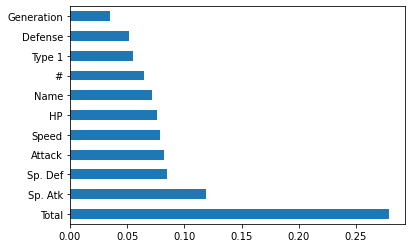

In [300]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(extracted_features,y)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=extracted_features.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

We will be using the total and special attack stats moving forwards

## 4. Model Building

In [356]:
# Use base stats of pokemon as features

X = np.column_stack((total,sp_attack))
y = le.fit_transform(legendary)

In [357]:
# Create train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)


In [367]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [368]:
y_pred = knn.predict(X_test)

In [369]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.955
[[180   0]
 [  9  11]]
